<a href="https://colab.research.google.com/github/ankeshkmr2010/ml_and_ann/blob/main/01_ANN_vs_LogisticsRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot

In [27]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
epochs = 20

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [28]:
# Prepare MNIST data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train - ',x_train.shape)
print('Test - ',x_test.shape)
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.
print('Flatten Train - ',x_train.shape)
print('Flatten Test - ',x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train -  (60000, 28, 28)
Test -  (10000, 28, 28)
Flatten Train -  (60000, 784)
Flatten Test -  (10000, 784)


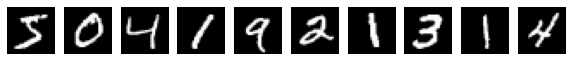

label for each of the above image: [5 0 4 1 9 2 1 3 1 4]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
y_train[0]

5

In [29]:
y_train_ohe = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Logistics Regression

In [ ]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter=epochs)
logreg.fit(x_train,y_train)# fit the model
print('c',logreg.intercept_.shape) # see the intercept
print('m',logreg.coef_.shape)# see the betas
print('Train Score r2 = ',logreg.score(x_train, y_train))
print('Test Score r2 = ',logreg.score(x_test, y_test))

print('Total Number of W nd B = ', logreg.intercept_.shape[0] * logreg.coef_.shape[1])

/Users/sandipan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c (10,)
m (10, 784)
Train Score r2 =  0.9106
Test Score r2 =  0.913
Total Number of W nd B =  7840


[5 0 4 1 9]


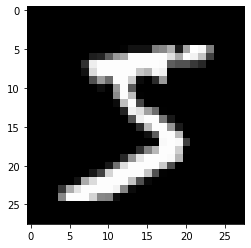

Model prediction: 5


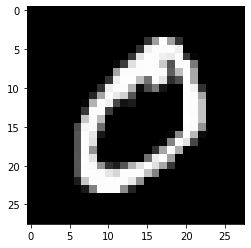

Model prediction: 0


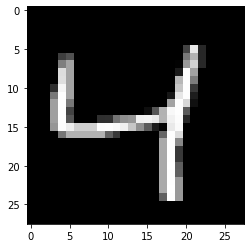

Model prediction: 4


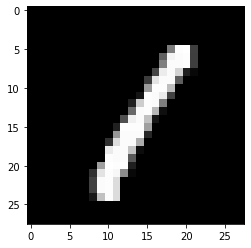

Model prediction: 1


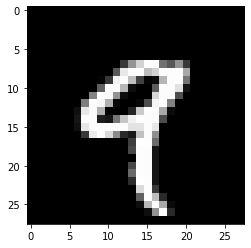

Model prediction: 9


In [ ]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_train[:n_images]
predictions = logreg.predict(test_images)
print(predictions)

# Display image and model prediction.
for i in range(n_images):
    pyplot.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    pyplot.show()
    print("Model prediction: %i" % predictions[i])

# ANN

In [30]:
# build NN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [277]:
# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [32]:
# Training parameters.
learning_rate = 0.1
batch_size = 256
display_step = 100
epochs = 20

In [33]:
history = model.fit(x_train, y_train_ohe,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test_ohe))
# Model Eval
score = model.evaluate(x_test, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
235/235 [==============================] - 9s 33ms/step - loss: 0.3133 - accuracy: 0.9044 - val_loss: 0.1376 - val_accuracy: 0.9564
Epoch 2/20
235/235 [==============================] - 9s 36ms/step - loss: 0.1184 - accuracy: 0.9629 - val_loss: 0.0813 - val_accuracy: 0.9736
Epoch 3/20
235/235 [==============================] - 9s 39ms/step - loss: 0.0824 - accuracy: 0.9742 - val_loss: 0.0916 - val_accuracy: 0.9711
Epoch 4/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0751 - val_accuracy: 0.9763
Epoch 5/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0493 - accuracy: 0.9843 - val_loss: 0.0666 - val_accuracy: 0.9791
Epoch 6/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0577 - val_accuracy: 0.9822
Epoch 7/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0636 - val_accuracy: 0.9817

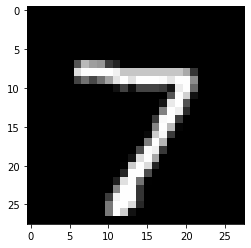

Model prediction: 7


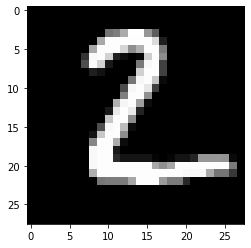

Model prediction: 2


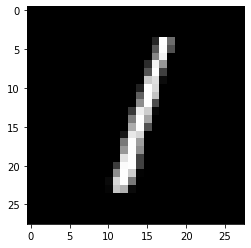

Model prediction: 1


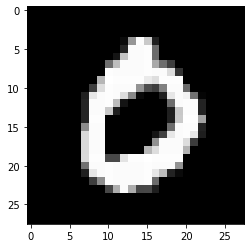

Model prediction: 0


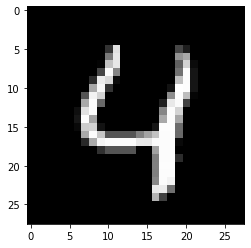

Model prediction: 4


In [ ]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = model.predict(test_images)

# Display image and model prediction.
for i in range(n_images):
    pyplot.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    pyplot.show()
    print("Model prediction: %i" % np.argmax(predictions[i]))

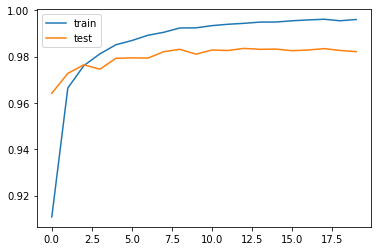

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [85]:
dat = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)


In [3]:
dat


((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [86]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)



In [87]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [88]:
x_test



array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [268]:
model = Sequential(name="bh1",)
# l1
model.add(Dense( 64, activation='relu', input_shape=(13,)))
#model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l2
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

# model.add(Dense(512, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# model.add(Dense(512, activation='relu'))

# out
model.add(Dense(1, activation='linear'))
model.summary()

Model: "bh1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 64)                896       
                                                                 
 batch_normalization_55 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_152 (Dense)           (None, 64)                4160      
                                                                 
 batch_normalization_56 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_153 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5,633
Trainable params: 5,377
Non-trainable param

In [275]:
model.compile(
    loss='mse',
    optimizer='sgd',
    metrics=['mae','mse']
    )

In [221]:
x_train.shape

(404, 13)

In [272]:
# Training parameters.
learning_rate = 0.1
batch_size = 50
display_step = 5
epochs = 600

In [273]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))
# Model Eval
score = model.evaluate(x_test, y_test, verbose=0)
for i in range(len(score)):
    print(f'{model.metrics_names[i]} — -> {score[i]}')

Epoch 1/600
9/9 [==============================] - 0s 17ms/step - loss: 60.3851 - mae: 5.4693 - mse: 60.3851 - val_loss: 109.0204 - val_mae: 8.9081 - val_mse: 109.0204
Epoch 2/600
9/9 [==============================] - 0s 11ms/step - loss: 57.0326 - mae: 5.0176 - mse: 57.0326 - val_loss: 133.4082 - val_mae: 10.0909 - val_mse: 133.4082
Epoch 3/600
9/9 [==============================] - 0s 11ms/step - loss: 55.5975 - mae: 4.9359 - mse: 55.5975 - val_loss: 92.5814 - val_mae: 7.9298 - val_mse: 92.5814
Epoch 4/600
9/9 [==============================] - 0s 9ms/step - loss: 57.4658 - mae: 5.0402 - mse: 57.4658 - val_loss: 188.0556 - val_mae: 12.3955 - val_mse: 188.0556
Epoch 5/600
9/9 [==============================] - 0s 10ms/step - loss: 54.6860 - mae: 5.0151 - mse: 54.6860 - val_loss: 303.0385 - val_mae: 15.4241 - val_mse: 303.0385
Epoch 6/600
9/9 [==============================] - 0s 10ms/step - loss: 57.7855 - mae: 5.3228 - mse: 57.7855 - val_loss: 87.7547 - val_mae: 7.3203 - val_mse: 87

In [267]:
for i in range(len(score)):
    print(f'{model.metrics_names[i]} — -> {score[i]}')

loss — -> 84.02705383300781
mae — -> 6.521311283111572
mse — -> 84.02705383300781
accuracy — -> 0.0
root_mean_squared_error — -> 0.0
root_mean_squared_error — -> 0.0


In [283]:
model = Sequential(name="bh1",)
# l1
model.add(Dense( 26, activation='relu', input_shape=(13,)))
#model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l2
model.add(Dense(26, activation='relu'))
#model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

# model.add(Dense(512, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# model.add(Dense(512, activation='relu'))

# out
model.add(Dense(1, activation='linear'))
model.summary()


model.compile(
    loss='mse',
    optimizer=RMSprop(),
    metrics=['mae','mse']
    )

learning_rate = 0.1
batch_size = 50
display_step = 5
epochs = 900
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))
# Model Eval
score = model.evaluate(x_test, y_test, verbose=0)
for i in range(len(score)):
    print(f'{model.metrics_names[i]} — -> {score[i]}')

Model: "bh1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_169 (Dense)           (None, 26)                364       
                                                                 
 batch_normalization_67 (Bat  (None, 26)               104       
 chNormalization)                                                
                                                                 
 dense_170 (Dense)           (None, 26)                702       
                                                                 
 batch_normalization_68 (Bat  (None, 26)               104       
 chNormalization)                                                
                                                                 
 dense_171 (Dense)           (None, 1)                 27        
                                                                 
Total params: 1,301
Trainable params: 1,197
Non-trainable param

In [289]:
model = Sequential(name="bh1",)
# l1
model.add(Dense( 39, activation='relu', input_shape=(13,),use_bias=True, bias_initializer='zeros'))
#model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l2
model.add(Dense(39, activation='relu',use_bias=True, bias_initializer='zeros'))
#model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

# model.add(Dense(512, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# model.add(Dense(512, activation='relu'))

# out
model.add(Dense(1, activation='linear'))
model.summary()


model.compile(
    loss='mse',
    optimizer=RMSprop(),
    metrics=['mae','mse']
    )

learning_rate = 0.1
batch_size = 50
display_step = 5
epochs = 100
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))
# Model Eval
score = model.evaluate(x_test, y_test, verbose=0)
for i in range(len(score)):
    print(f'{model.metrics_names[i]} — -> {score[i]}')

Model: "bh1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 39)                546       
                                                                 
 batch_normalization_77 (Bat  (None, 39)               156       
 chNormalization)                                                
                                                                 
 dense_186 (Dense)           (None, 39)                1560      
                                                                 
 batch_normalization_78 (Bat  (None, 39)               156       
 chNormalization)                                                
                                                                 
 dense_187 (Dense)           (None, 1)                 40        
                                                                 
Total params: 2,458
Trainable params: 2,302
Non-trainable param